In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy

from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_columns', 70)

In [2]:
data = pd.read_csv('data/check_1_r/train.csv')

In [3]:
data.head(5)

,datetime_0,target,number_0,number_1,number_2,number_3,number_4,number_5,number_6,number_7,number_8,number_9,number_10,number_11,number_12,number_13,number_14,number_15,number_16,number_17,number_18,number_19,number_20,number_21,number_22,number_23,number_24,number_25,number_26,number_27,number_28,number_29,number_30,number_31,number_32,number_33,number_34,number_35,number_36,number_37,number_38,line_id
0,2017-03-11,0.000000,0.485840,0.169376,0.866834,0.968541,0.001060,1.000000,0.573018,0.981073,0.987302,0,0,0.973126,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2017-01-10,30.231827,0.303703,0.200773,0.869347,0.973308,0.009912,1.000000,0.141864,0.993691,0.987302,0,0,0.969738,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,2017-02-26,0.000000,0.568567,0.190993,0.929648,0.987607,0.002207,1.000000,1.000000,1.000000,1.000000,1,0,0.972392,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,2017-02-02,22.756754,0.336114,0.051069,0.919598,0.983794,0.006191,1.000000,0.166898,0.984227,0.984127,0,0,0.971037,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,2017-06-08,22.754865,0.330694,0.132386,0.655779,0.889418,0.199192,0.727273,0.126565,0.703470,0.685714,0,0,0.978150,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7


In [4]:
print(data.shape)
print(data.dtypes.value_counts())

(365, 42)
int64      30
float64    11
object      1
dtype: int64


In [5]:
data.nunique()

datetime_0    365
target        247
number_0      246
number_1      247
number_2      162
number_3      135
number_4       73
number_5        7
number_6      115
number_7      100
number_8      102
number_9        2
number_10       2
number_11     365
number_12       2
number_13       2
number_14       2
number_15       2
number_16       2
number_17       2
number_18       2
number_19       2
number_20       2
number_21       2
number_22       2
number_23       2
number_24       2
number_25       2
number_26       2
number_27       2
number_28       2
number_29       2
number_30       2
number_31       2
number_32       2
number_33       2
number_34       2
number_35       2
number_36       2
number_37       2
number_38       2
line_id       365
dtype: int64

In [6]:
data.isna().sum()

datetime_0    0
target        0
number_0      0
number_1      0
number_2      0
number_3      0
number_4      0
number_5      0
number_6      0
number_7      0
number_8      0
number_9      0
number_10     0
number_11     0
number_12     0
number_13     0
number_14     0
number_15     0
number_16     0
number_17     0
number_18     0
number_19     0
number_20     0
number_21     0
number_22     0
number_23     0
number_24     0
number_25     0
number_26     0
number_27     0
number_28     0
number_29     0
number_30     0
number_31     0
number_32     0
number_33     0
number_34     0
number_35     0
number_36     0
number_37     0
number_38     0
line_id       0
dtype: int64

In [7]:
data.describe()

,target,number_0,number_1,number_2,number_3,number_4,number_5,number_6,number_7,number_8,number_9,number_10,number_11,number_12,number_13,number_14,number_15,number_16,number_17,number_18,number_19,number_20,number_21,number_22,number_23,number_24,number_25,number_26,number_27,number_28,number_29,number_30,number_31,number_32,number_33,number_34,number_35,number_36,number_37,number_38,line_id
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.605257,0.516228,0.205112,0.608632,0.852131,0.290996,0.666252,0.302688,0.646290,0.645210,0.043836,0.030137,0.979957,0.145205,0.142466,0.142466,0.142466,0.142466,0.142466,0.142466,0.084932,0.076712,0.084932,0.082192,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932,0.010959,0.032877,0.032877,0.032877,0.010959,0.010959,0.065753,0.041096,269.131507
std,16.731888,0.146753,0.127578,0.214655,0.166493,0.171512,0.249354,0.225507,0.256725,0.257029,0.205010,0.171199,0.005957,0.352791,0.350007,0.350007,0.350007,0.350007,0.350007,0.350007,0.279162,0.266500,0.279162,0.275034,0.279162,0.275034,0.279162,0.279162,0.275034,0.279162,0.275034,0.279162,0.104252,0.178559,0.178559,0.178559,0.104252,0.104252,0.248191,0.198785,159.048922
min,0.000000,0.000000,0.000000,0.180905,0.000000,0.000000,0.181818,0.000000,0.186120,0.193651,0.000000,0.000000,0.969682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.420169,0.108137,0.424623,0.802669,0.196531,0.454545,0.121001,0.429022,0.431746,0.000000,0.000000,0.974819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,131.000000
50%,27.186048,0.510069,0.178587,0.625628,0.878932,0.394839,0.636364,0.166898,0.630915,0.634921,0.000000,0.000000,0.979957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,269.000000
75%,32.193718,0.625153,0.283507,0.791457,0.941849,0.399707,0.909091,0.477051,0.905363,0.911111,0.000000,0.000000,0.985095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,414.000000
max,95.249705,0.904415,0.557598,1.000000,1.000000,0.603106,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990233,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,535.000000


Непонятная нормировка данных, похоже на minmaxscaler, но не везде заметна нормировка от 0 до 1
Также вероятно что дамми переменные взяты от нескольких категориальных, ввиду отсутствия повторений.

In [8]:
data["datetime_0"] = pd.to_datetime(data["datetime_0"])

cols = data.nunique()[data.nunique()==2].index.tolist()
data[cols] = data[cols].astype(bool)

print(data.dtypes)

datetime_0    datetime64[ns]
target               float64
number_0             float64
number_1             float64
number_2             float64
number_3             float64
number_4             float64
number_5             float64
number_6             float64
number_7             float64
number_8             float64
number_9                bool
number_10               bool
number_11            float64
number_12               bool
number_13               bool
number_14               bool
number_15               bool
number_16               bool
number_17               bool
number_18               bool
number_19               bool
number_20               bool
number_21               bool
number_22               bool
number_23               bool
number_24               bool
number_25               bool
number_26               bool
number_27               bool
number_28               bool
number_29               bool
number_30               bool
number_31               bool
number_32     

c:\users\yarne\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


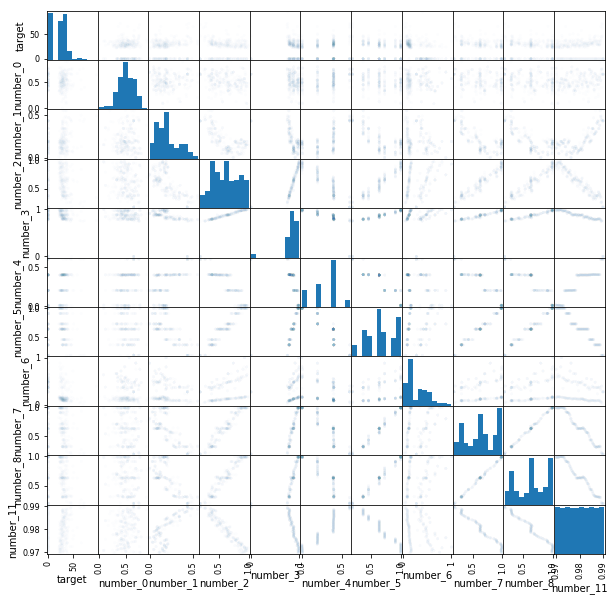

In [9]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data[data.dtypes[data.dtypes == np.float64].index], alpha = .01, figsize = (10, 10))
pass

In [10]:
data.corr()

,target,number_0,number_1,number_2,number_3,number_4,number_5,number_6,number_7,number_8,number_9,number_10,number_11,number_12,number_13,number_14,number_15,number_16,number_17,number_18,number_19,number_20,number_21,number_22,number_23,number_24,number_25,number_26,number_27,number_28,number_29,number_30,number_31,number_32,number_33,number_34,number_35,number_36,number_37,number_38,line_id
target,1.000000,-0.007723,0.088430,-0.072685,0.101943,0.091003,-0.099073,-0.567423,-0.091819,-0.092310,-0.276858,0.163409,8.109754e-02,2.696505e-01,0.241364,0.183565,0.178696,0.178650,-0.527035,-0.527035,-0.102817,-0.059631,0.003230,-0.036286,-0.024923,0.000526,-0.001181,-0.001917,0.010593,0.035263,0.025351,0.149090,0.169204,0.238805,0.243357,0.174647,0.088573,0.114234,0.246042,0.092842,-0.071313
number_0,-0.007723,1.000000,0.018293,-0.296165,-0.245326,0.259178,-0.283351,-0.003679,-0.239784,-0.232537,0.109416,0.074743,2.278589e-01,4.687083e-02,-0.041116,-0.042091,0.003997,0.010655,0.010655,0.010655,-0.025382,-0.077598,-0.110954,-0.052569,0.090685,-0.072879,0.055700,0.012859,-0.109737,0.069446,0.013920,0.199715,-0.083002,-0.149433,0.063218,-0.061883,-0.031902,-0.109229,0.049128,0.029852,-0.046087
number_1,0.088430,0.018293,1.000000,-0.698635,-0.557113,0.571003,-0.698266,-0.241078,-0.726301,-0.730000,0.081415,-0.108616,7.417327e-01,-1.341157e-04,0.012711,0.047489,-0.022259,-0.012602,-0.012602,-0.012602,0.045373,-0.150622,-0.107812,-0.178443,-0.339465,-0.247743,-0.253947,-0.023984,0.104991,0.214080,0.374382,0.557144,-0.053585,-0.031256,0.030078,-0.083062,0.026858,-0.050815,0.028406,0.005821,-0.022962
number_2,-0.072685,-0.296165,-0.698635,1.000000,0.714638,-0.905809,0.964178,0.337672,0.964365,0.960995,-0.052197,0.075210,-9.656701e-01,1.322797e-03,-0.008935,0.000252,0.010175,-0.000942,-0.000942,-0.000942,0.171945,0.432387,0.344846,0.236404,0.097071,0.069209,0.021506,-0.147249,-0.180883,-0.304023,-0.321772,-0.402742,0.037649,0.020742,0.008495,0.059281,0.037649,0.050604,0.030881,0.039385,-0.029541
number_3,0.101943,-0.245326,-0.557113,0.714638,1.000000,-0.648989,0.701128,0.161513,0.682994,0.677214,-0.345440,0.057266,-6.662939e-01,-1.426346e-02,0.017661,0.020717,0.021976,-0.015326,-0.015326,-0.015326,-0.222651,0.233100,0.212009,0.155533,0.074241,0.053673,0.051364,-0.014111,-0.048416,-0.098970,-0.112301,-0.272180,0.024965,0.025933,0.021088,0.049983,0.026021,0.030548,0.039723,-0.018855,-0.109082
number_4,0.091003,0.259178,0.571003,-0.905809,-0.648989,1.000000,-0.906275,-0.320680,-0.903040,-0.901920,0.009753,-0.111908,9.217860e-01,-3.610967e-03,-0.017104,-0.016765,0.009629,0.009293,0.009293,0.009293,-0.233481,-0.481484,-0.336826,-0.163589,-0.165840,0.021703,0.183846,0.186439,0.184400,0.195069,0.191546,0.399837,0.004242,0.009199,0.008567,-0.046515,-0.024731,-0.025139,0.000016,-0.013349,0.014548
number_5,-0.099073,-0.283351,-0.698266,0.964178,0.701128,-0.906275,1.000000,0.297488,0.991844,0.989797,-0.059898,0.060748,-9.756190e-01,-6.883692e-03,0.002587,0.002587,0.002587,-0.000274,-0.000274,-0.000274,0.150001,0.386333,0.390386,0.291834,0.081832,0.029632,-0.036566,-0.036566,-0.130602,-0.276951,-0.363670,-0.470694,0.016188,-0.010911,-0.005302,0.028354,0.035402,0.025795,0.016584,0.030576,-0.021863
number_6,-0.567423,-0.003679,-0.241078,0.337672,0.161513,-0.320680,0.297488,1.000000,0.302987,0.300340,0.283225,0.082546,-3.080527e-01,-1.401227e-01,-0.291083,-0.288130,-0.296457,0.338969,0.338969,0.338969,0.068001,0.250455,0.037047,0.038073,0.138286,0.010659,-0.014665,-0.139818,-0.077130,-0.084586,-0.094811,-0.121974,0.025430,-0.054050,-0.109182,-0.097415,-0.081024,-0.013251,-0.131089,-0.087410,0.010470
number_7,-0.091819,-0.239784,-0.726301,0.964365,0.682994,-0.903040,0.991844,0.302987,1.000000,0.998860,-0.039352,0.068499,-9.863779e-01,1.607018e-04,0.007287,0.002754,0.000053,-0.003419,-0.003419,-0.003419,0.158884,0.387298,0.389124,0.291848,0.122485,0.024398,-0.019843,-0.041367,-0.150383,-0.308006,-0.390339,-0.449850,0.016354,-0.011814,-0.005008,0.030724,0.0254

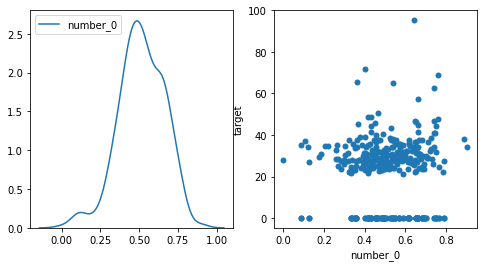

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(data["number_0"], ax=ax1)
sns.scatterplot(x="number_0", y="target", sizes=(1, 8), linewidth=0, data=data, ax=ax2)

In [12]:
target = data.pop("target")

In [13]:
data[data.dtypes[data.dtypes == np.float64].index] = minmax_scale(data[data.dtypes[data.dtypes == np.float64].index])

In [14]:
data.describe()

,number_0,number_1,number_2,number_3,number_4,number_5,number_6,number_7,number_8,number_11,line_id
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.570787,0.367850,0.522195,0.852131,0.482495,0.592085,0.302688,0.565403,0.560004,0.500000,269.131507
std,0.162263,0.228799,0.262064,0.166493,0.284381,0.304766,0.225507,0.315433,0.318757,0.289864,159.048922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.464575,0.193934,0.297546,0.802669,0.325865,0.333333,0.121001,0.298450,0.295276,0.250000,131.000000
50%,0.563976,0.320280,0.542945,0.878932,0.654675,0.555556,0.166898,0.546512,0.547244,0.500000,269.000000
75%,0.691223,0.508444,0.745399,0.941849,0.662747,0.888889,0.477051,0.883721,0.889764,0.750000,414.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,535.000000


In [15]:
data.drop(["datetime_0"], axis=1, inplace=True)

In [16]:
target_class = (target > 0).astype(bool)

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(data, target_class, test_size = 0.2, random_state = 22)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [19]:
y_train_predict = knn.predict(X_train)
y_valid_predict = knn.predict(X_valid)

err_train = np.mean(y_train != y_train_predict)
err_valid = np.mean(y_valid != y_valid_predict)

print(err_train, err_valid)

0.363013698630137 0.3835616438356164


In [20]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_valid, y_valid_predict))

[[ 8 11]
 [17 37]]


In [21]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.34246575342465757 55


In [22]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_valid = np.mean(y_valid != knn.predict(X_valid))

print(err_train, err_valid)

0.3424657534246575 0.2602739726027397


In [23]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier().fit(X_train, y_train)
clf.coef_

array([[ 2.62421452e-02,  1.70907737e-01,  1.26218273e-01,
         1.64269154e-01, -1.99856816e-02, -2.67551175e-02,
        -3.72148698e-01,  6.62178655e-02,  6.87836853e-02,
        -1.37791569e+00,  8.80596860e-02, -1.10437254e-01,
         4.73150328e-01,  4.90753071e-01,  4.90342288e-01,
         5.04398527e-01,  5.63071770e-01, -1.26275246e+00,
        -1.25896352e+00, -1.16391150e-01,  2.05630794e-02,
        -1.09368174e-01, -5.72419200e-02, -1.04899842e-02,
         6.21503614e-03,  4.96019353e-02,  3.47921876e-02,
         5.27387688e-02,  7.15871216e-02, -2.17212773e-02,
         7.97143765e-02,  1.32442239e-02,  6.32156489e-02,
        -5.97380402e-05,  2.94273617e-02, -1.68884394e-02,
         1.89415996e-02,  3.92333932e-02,  3.55236953e-02,
        -3.51246518e-05]])

In [24]:
fpr, tpr, threshold = roc_curve(y_valid, clf.predict(X_valid))
roc_auc = auc(fpr, tpr)

In [26]:
print(confusion_matrix(y_valid, clf.predict(X_valid)))

[[19  0]
 [ 0 54]]


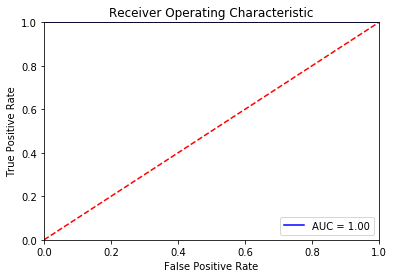

In [25]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()